### Introduction
This project aims to use the Bootstrapping technique to analyze potential profit and risks of data on oil samples from three regions. I will be building a model that will help to pick the region with the highest profit margin.

**Objective:** Help OilyGiant Mining Company find the best place for a new well.

**Details:**
- There should be a study of 500 wells for each region, with the best 200 being picked for the profit calculation.
- The budget for the development of 200 oil wells is 100 USD million.
- One barrel of raw materials brings 4.5 USD of revenue.
- The revenue from one unit of product is 4,500 dollars (unit = a thousand barrels).
- After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.

The data is synthetic: contract details and well characteristics are not disclosed.

**Steps Include:**
- Collect the oil well parameters in the selected region: oil quality and volume of reserves
- Build a model for predicting the volume of reserves in the new wells
- Pick the oil wells with the highest estimated values
- Pick the region with the highest total profit for the selected oil wells

  
**Data Details:**
Each dataset contains geological exploration data for each region. 
- `id` represents a unique identifier for each oil well.
- `f0, f1, f2` features of points.
- `product` volume of reserves in the oil well (thousand barrels).

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from IPython.display import display

In [25]:
region_1 = pd.read_csv('geo_data_0.csv')
region_2 = pd.read_csv('geo_data_1.csv')
region_3 = pd.read_csv('geo_data_2.csv')

display(region_1.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [26]:
region_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [27]:
region_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [28]:
display(region_1.isnull().sum())
display(region_2.isnull().sum())
display(region_3.isnull().sum())

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [29]:
print(region_1.duplicated().sum())
print(region_2.duplicated().sum())
print(region_3.duplicated().sum())

0
0
0


In [30]:
region_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [31]:
region_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [32]:
region_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


### My Thoughts So Far

I believed the data was cleaned prior to my analysis, but I inspected it to confirm. I will now continue with the train/validation splits.

In [33]:
# Separating features and targets
region1_features= region_1.drop(['id','product'], axis=1)
region1_target = region_1['product']
region2_features = region_2.drop(['id','product'], axis=1)
region2_target = region_2['product']
region3_features = region_3.drop(['id','product'], axis=1)
region3_target = region_3['product']

In [34]:
# Train/Valid sets for all regions
reg1_features_train, reg1_features_valid, reg1_target_train, reg1_target_valid= train_test_split(region1_features, region1_target, test_size=0.25, random_state=42)
reg2_features_train, reg2_features_valid, reg2_target_train, reg2_target_valid= train_test_split(region2_features, region2_target, test_size=0.25, random_state=42)
reg3_features_train, reg3_features_valid, reg3_target_train, reg3_target_valid= train_test_split(region3_features, region3_target, test_size=0.25, random_state=42)

In [35]:
# Region 1's model fit and RMSE score
model = LinearRegression()
model.fit(reg1_features_train, reg1_target_train)
reg1_predictions = pd.Series(model.predict(reg1_features_valid)).reset_index(drop=True)
rmse_reg1= np.sqrt(mean_squared_error(reg1_target_valid,reg1_predictions))
print('RMSE of Region 1:', rmse_reg1)

RMSE of Region 1: 37.75660035026169


In [36]:
# Region 2
model.fit(reg2_features_train, reg2_target_train)
reg2_predictions = pd.Series(model.predict(reg2_features_valid)).reset_index(drop=True)
rmse_reg2= np.sqrt(mean_squared_error(reg2_target_valid,reg2_predictions))
print('RMSE of Region 2:', rmse_reg2)

RMSE of Region 2: 0.890280100102884


In [37]:
# Region 3
model.fit(reg3_features_train, reg3_target_train)
reg3_predictions = pd.Series(model.predict(reg3_features_valid)).reset_index(drop=True)
rmse_reg3= np.sqrt(mean_squared_error(reg3_target_valid, reg3_predictions))
print('RMSE of Region 3:', rmse_reg3)

RMSE of Region 3: 40.145872311342174


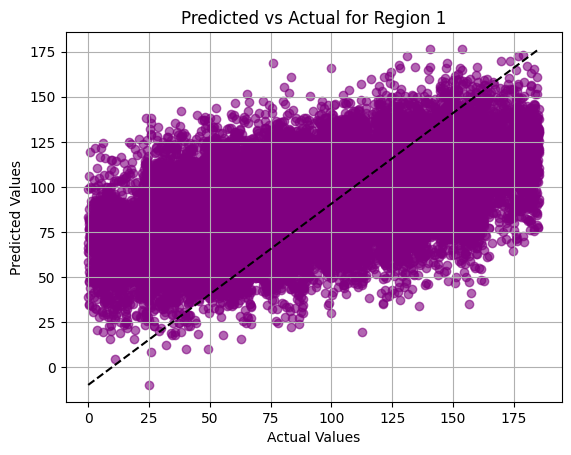

In [38]:
plt.scatter(reg1_target_valid,reg1_predictions, alpha=0.6, color='purple')
plt.plot([min(reg1_target_valid), max(reg1_target_valid)], [min(reg1_predictions), max(reg1_predictions)], linestyle='--', color='black')
plt.title('Predicted vs Actual for Region 1')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

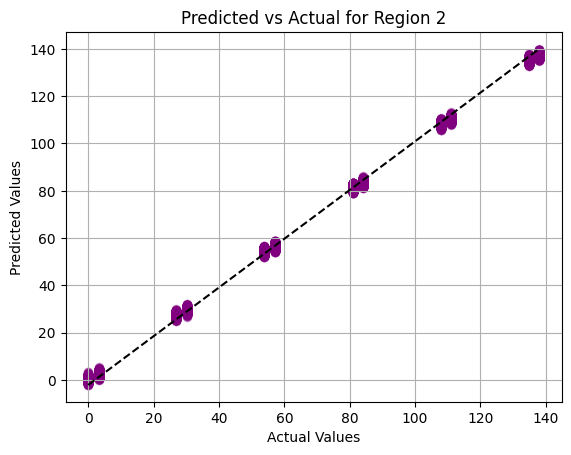

In [39]:
plt.scatter(reg2_target_valid,reg2_predictions, alpha=0.3, color='purple')
plt.plot([min(reg2_target_valid), max(reg2_target_valid)], [min(reg2_predictions), max(reg2_predictions)], linestyle='--', color='black')
plt.title('Predicted vs Actual for Region 2')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

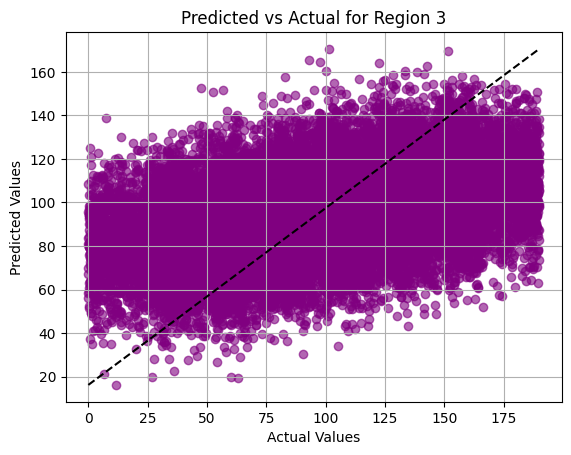

In [40]:
plt.scatter(reg3_target_valid,reg3_predictions, alpha=0.6, color='purple')
plt.plot([min(reg3_target_valid), max(reg3_target_valid)], [min(reg3_predictions), max(reg3_predictions)], linestyle='--', color='black')
plt.title('Predicted vs Actual for Region 3')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

### Linear Regression Model Results

The linear regression model performed similarly for Regions 1 and 3, with Region 1's RMSE being **37.76** and Region 3's, **40.15**. This means that on average, the model's predictions of oil reserves for those regions are off by about 40 thousand barrels. The model performed exceptionally well for Region 2, making nearly perfect predictions exhibited by its datapoints tightly clustering around the diagonal line and its very low RMSE of **0.89**. 

In [41]:
# Storing key values
selected_wells = 200
budget= 100_000_000
revenue_per_unit= 4_500

In [42]:
# Calculating the volume of reserves sufficient for developing a new well without losses
cost_per_well = budget / selected_wells     
total_break_even_volume = budget / revenue_per_unit
break_even_volume_per_well= total_break_even_volume / selected_wells
# Average volume of reserves in each region
reg1_avg= region1_target.mean()
reg2_avg= region2_target.mean()
reg3_avg= region3_target.mean()
print(f'Total volume of reserves to break even: {total_break_even_volume:.2f}')
print(f'Volume of reserves to break even (per well): {break_even_volume_per_well:.2f}')
print(f'Average volume of reserves for Region 1: {reg1_avg:.2f}')
print(f'Average volume of reserves for Region 2: {reg2_avg:.2f}')
print(f'Average volume of reserves for Region 3: {reg3_avg:.2f}')

Total volume of reserves to break even: 22222.22
Volume of reserves to break even (per well): 111.11
Average volume of reserves for Region 1: 92.50
Average volume of reserves for Region 2: 68.83
Average volume of reserves for Region 3: 95.00


There is a $100 million budget to develop 200 wells. To break even (Revenue - Budget = 0), each well will need to produce a volume of about **111** units (around **22 million total** for that region). As shown in the information above, the average volume produced for each region is below our threshold. Region 1 and 3 averaged similarly at **92.5 and 95** units, but surprisingly, Region 2 was the lowest with an average of **68.8** units despite its nearly perfect predictions earlier. This means that choosing random wells in any region will likely result in a loss. However, profit can be expected if the top 200 highest predicted wells perform better than the average.

In [43]:
# Function to calculate profit for the top 200 predictions
def calculate_profit(predictions, actuals, n=200):
    reg_200= predictions.sort_values(ascending=False).head(n).index
    reg_actual= actuals.loc[reg_200]
    revenue = reg_actual.sum() * revenue_per_unit
    return revenue-budget

In [ ]:
# Resetting the target validation sets indices so they and the predicitons match
reg1_target_valid= reg1_target_valid.reset_index(drop=True)
reg2_target_valid= reg2_target_valid.reset_index(drop=True)
reg3_target_valid= reg3_target_valid.reset_index(drop=True)

# Calculating each region's profits
profit1= calculate_profit(reg1_predictions, reg1_target_valid)
profit2= calculate_profit(reg2_predictions, reg2_target_valid)
profit3= calculate_profit(reg3_predictions, reg3_target_valid)

print(f'Profit of Region 1: ${profit1:,.2f}')
print(f'Profit of Region 2: ${profit2:,.2f}')
print(f'Profit of Region 3: ${profit3:,.2f}')

Profit of Region 1: $33,591,411.14
Profit of Region 2: $24,150,866.97
Profit of Region 3: $25,985,717.59


### Profit Calculation Results

Using a Linear Regression model to predict the volume of reserves for each region, the top 200 predictions were chosen from that group to calculate profits. The results were as follows:
- Region 1 was predicted to generate a profit of *`$33.59 million`*
- Region 2 was predicted to generate a profit of *`$24.15 million`*
- Region 3 was predicted to generate a profit of *`$25.99 million`*

As expected, selecting the top 200 predictions exceeds the amount needed to break even, generating profits. Despite Region 3 having the highest amount of reserves on average, Region 1's top 200 predictions genrates the highest profit. Region 2, has the lowest profits and the lowest reserves on average although it was the region with the most accurate model predictions previously.

In [45]:
# Bootstrapping to calculate profits for each region
regions= [region_1, region_2, region_3]
bootstrapped_profits = []
state= np.random.RandomState(42)

for region in regions:
    features = region.drop(['id', 'product'], axis=1)
    target = region['product']
    
    model = LinearRegression()
    model.fit(features, target)
    
    values = []
    for _ in range(1000):
        sample_indices = state.choice(features.index, size=500, replace=True)
        sample_features= features.loc[sample_indices].reset_index(drop=True)
        sample_target= target.loc[sample_indices].reset_index(drop=True)

        sample_predictions= pd.Series(model.predict(sample_features))
        values.append(calculate_profit(sample_predictions, sample_target))
    bootstrapped_profits.append(pd.Series(values))
    
reg1_profit= bootstrapped_profits[0]
reg2_profit= bootstrapped_profits[1]
reg3_profit= bootstrapped_profits[2]

In [46]:
# Summary for each region
for i, profits in enumerate(bootstrapped_profits, start=1):
    mean= profits.mean()
    lower= profits.quantile(0.025)
    upper= profits.quantile(0.975)
    loss_risk= (profits < 0).mean()*100

    print(f"\nRegion {i} Results:")
    print(f"  Average profit: ${mean:,.2f}")
    print(f"  95% confidence interval: ${lower:,.2f} to ${upper:,.2f}")
    print(f"  Loss risk: {loss_risk:.2f}%")


Region 1 Results:
  Average profit: $4,302,994.92
  95% confidence interval: $-446,289.62 to $9,382,844.13
  Loss risk: 4.00%

Region 2 Results:
  Average profit: $4,522,022.13
  95% confidence interval: $595,696.85 to $8,566,232.27
  Loss risk: 1.40%

Region 3 Results:
  Average profit: $3,669,320.48
  95% confidence interval: $-1,705,487.87 to $8,714,968.77
  Loss risk: 8.00%


### Conclusion

Based on the Linear Regression model and profit simulation, **Region 2** is shown to be the best choice for development. The model yielded a low RMSE score of **0.89**, indicating the model has high predictive accuracy. 

Profit analysis showed that Region 2's top 200 predicted wells to produce the highest average profit of *`$4.5 million`*. Bootstrapping confirmed the reliability of this outcome with a 95% confidence interval ranging from *`$596 thousand`* to *`$8.6 million`*. Region 2 was also the only region to produce a loss risk lower than our 2.5% threshold at **1.40%**.